In [1]:
# Alphabetical order is standard
# We're doing "import superlongname as abbrev" for our laziness - this way we don't have to type out the whole thing each time.

# Baked-in within python modules
from collections import defaultdict

# Python plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

# Numerical python library (pronounced "num-pie")
import numpy as np

# Dataframes in Python
import pandas as pd

# T-test of independent samples
from scipy.stats import ttest_ind, spearmanr

# Statistical plotting library we'll use
import seaborn as sns
sns.set(style='ticks', font_scale=1.4)

# Matrix decomposition
from sklearn.decomposition import PCA, FastICA

# Manifold learning
from sklearn.manifold import MDS, TSNE

# UMAP
import umap
import hdbscan
import louvain
import igraph as ig

# Clustering
from sklearn.cluster import KMeans, MiniBatchKMeans, SpectralClustering

from sklearn.preprocessing import StandardScaler

# Plotting dendrograms
from scipy.cluster import hierarchy
from scipy.spatial import distance

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline

In [2]:
expression = pd.read_csv("all_tumor_dump_TPM_geneCollapsed.csv", index_col=0)
print(expression.shape)
expression.head()

(55430, 2304)


,3M-DP-P1-A1-A1_S1Aligned.quant,3M-DP-P1-A1-A2_S2Aligned.quant,3M-DP-P1-A1-A3_S3Aligned.quant,3M-DP-P1-A1-A4_S4Aligned.quant,3M-DP-P1-A1-A5_S5Aligned.quant,3M-DP-P1-A1-A6_S6Aligned.quant,3M-DP-P1-A1-A7_S7Aligned.quant,3M-DP-P1-A1-A8_S8Aligned.quant,3M-DP-P1-A1-A9_S9Aligned.quant,3M-DP-P1-A1-A10_S10Aligned.quant,...,11M-MP-P4-E3-H3_S2199Aligned.quant,11M-MP-P4-E3-H4_S2200Aligned.quant,11M-MP-P4-E3-H5_S2201Aligned.quant,11M-MP-P4-E3-H6_S2202Aligned.quant,11M-MP-P4-E3-H7_S2203Aligned.quant,11M-MP-P4-E3-H8_S2204Aligned.quant,11M-MP-P4-E3-H9_S2205Aligned.quant,11M-MP-P4-E3-H10_S2206Aligned.quant,11M-MP-P4-E3-H11_S2207Aligned.quant,11M-MP-P4-E3-H12_S2208Aligned.quant
ENSMUSG00000000001.4,0.0,0.0,4.471195,12.238044,0.0,25.608345,25.492771,0.0,0.0,0.0,...,9.810269,34.789491,8.874763,33.735424,33.980533,39.361483,19.798052,24.395406,19.901369,19.713143
ENSMUSG00000000003.15,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000028.15,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,16.666066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000031.16,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000037.17,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
metadata = pd.read_csv("all_tumor_dump_metadata.csv", index_col=0)
print(metadata.shape)
metadata.head()

(2304, 4)


,type,colour,mouse,mouse_colour
3M-DP-P1-A1-A1_S1Aligned.quant,dump,#05a413,3M,#0353d6
3M-DP-P1-A1-A2_S2Aligned.quant,dump,#05a413,3M,#0353d6
3M-DP-P1-A1-A3_S3Aligned.quant,dump,#05a413,3M,#0353d6
3M-DP-P1-A1-A4_S4Aligned.quant,dump,#05a413,3M,#0353d6
3M-DP-P1-A1-A5_S5Aligned.quant,dump,#05a413,3M,#0353d6


In [4]:
count = pd.read_csv("all_tumor_dump_Counts_geneCollapsed.csv", index_col = 0)
print(count.shape)
count.head()

(55430, 2304)


,3M-DP-P1-A1-A1_S1Aligned.quant,3M-DP-P1-A1-A2_S2Aligned.quant,3M-DP-P1-A1-A3_S3Aligned.quant,3M-DP-P1-A1-A4_S4Aligned.quant,3M-DP-P1-A1-A5_S5Aligned.quant,3M-DP-P1-A1-A6_S6Aligned.quant,3M-DP-P1-A1-A7_S7Aligned.quant,3M-DP-P1-A1-A8_S8Aligned.quant,3M-DP-P1-A1-A9_S9Aligned.quant,3M-DP-P1-A1-A10_S10Aligned.quant,...,11M-MP-P4-E3-H3_S2199Aligned.quant,11M-MP-P4-E3-H4_S2200Aligned.quant,11M-MP-P4-E3-H5_S2201Aligned.quant,11M-MP-P4-E3-H6_S2202Aligned.quant,11M-MP-P4-E3-H7_S2203Aligned.quant,11M-MP-P4-E3-H8_S2204Aligned.quant,11M-MP-P4-E3-H9_S2205Aligned.quant,11M-MP-P4-E3-H10_S2206Aligned.quant,11M-MP-P4-E3-H11_S2207Aligned.quant,11M-MP-P4-E3-H12_S2208Aligned.quant
ENSMUSG00000000001.4,0,0.0,3.0,6.0,0.0,7.0,1.0,0.0,0.0,0.0,...,21.0,54.0,18.0,48.0,40.0,5.0,8.0,14.0,21.0,1.0
ENSMUSG00000000003.15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000028.15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000031.16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000037.17,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
expression_logged = np.log2(expression+1)
print(expression_logged.shape)
expression_logged.head()

(55430, 2304)


,3M-DP-P1-A1-A1_S1Aligned.quant,3M-DP-P1-A1-A2_S2Aligned.quant,3M-DP-P1-A1-A3_S3Aligned.quant,3M-DP-P1-A1-A4_S4Aligned.quant,3M-DP-P1-A1-A5_S5Aligned.quant,3M-DP-P1-A1-A6_S6Aligned.quant,3M-DP-P1-A1-A7_S7Aligned.quant,3M-DP-P1-A1-A8_S8Aligned.quant,3M-DP-P1-A1-A9_S9Aligned.quant,3M-DP-P1-A1-A10_S10Aligned.quant,...,11M-MP-P4-E3-H3_S2199Aligned.quant,11M-MP-P4-E3-H4_S2200Aligned.quant,11M-MP-P4-E3-H5_S2201Aligned.quant,11M-MP-P4-E3-H6_S2202Aligned.quant,11M-MP-P4-E3-H7_S2203Aligned.quant,11M-MP-P4-E3-H8_S2204Aligned.quant,11M-MP-P4-E3-H9_S2205Aligned.quant,11M-MP-P4-E3-H10_S2206Aligned.quant,11M-MP-P4-E3-H11_S2207Aligned.quant,11M-MP-P4-E3-H12_S2208Aligned.quant
ENSMUSG00000000001.4,0.0,0.0,2.451856,3.726618,0.0,4.733807,4.727527,0.0,0.0,0.0,...,3.434331,5.161464,3.303746,5.118336,5.12848,5.334907,4.378377,4.666496,4.385526,4.372475
ENSMUSG00000000003.15,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000028.15,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,4.142909,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000031.16,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000037.17,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


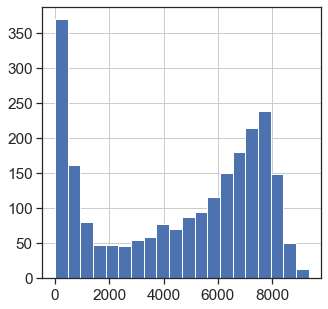

In [6]:
number_of_detected_genes = (expression_logged > 1).sum()

figheight = 5
figwidth = 5

fig, ax = plt.subplots(figsize=(figwidth, figheight))
number_of_detected_genes.hist(bins=20)

In [7]:
number_of_detected_genes.head()

3M-DP-P1-A1-A1_S1Aligned.quant     187
3M-DP-P1-A1-A2_S2Aligned.quant     886
3M-DP-P1-A1-A3_S3Aligned.quant    5717
3M-DP-P1-A1-A4_S4Aligned.quant    5271
3M-DP-P1-A1-A5_S5Aligned.quant    1633
dtype: int64

In [8]:
num_detected_genes = number_of_detected_genes.to_frame(name = 'num_genes')
num_detected_genes.head()

,num_genes
3M-DP-P1-A1-A1_S1Aligned.quant,187
3M-DP-P1-A1-A2_S2Aligned.quant,886
3M-DP-P1-A1-A3_S3Aligned.quant,5717
3M-DP-P1-A1-A4_S4Aligned.quant,5271
3M-DP-P1-A1-A5_S5Aligned.quant,1633


In [9]:
metadata = metadata.join(num_detected_genes)
metadata.head()

,type,colour,mouse,mouse_colour,num_genes
3M-DP-P1-A1-A1_S1Aligned.quant,dump,#05a413,3M,#0353d6,187
3M-DP-P1-A1-A2_S2Aligned.quant,dump,#05a413,3M,#0353d6,886
3M-DP-P1-A1-A3_S3Aligned.quant,dump,#05a413,3M,#0353d6,5717
3M-DP-P1-A1-A4_S4Aligned.quant,dump,#05a413,3M,#0353d6,5271
3M-DP-P1-A1-A5_S5Aligned.quant,dump,#05a413,3M,#0353d6,1633


In [10]:
genes_of_interest = (expression_logged > 1).sum(axis=1) >= 100
expression_logged_filtered = expression_logged.loc[genes_of_interest]
print(expression_logged_filtered.shape)

(12562, 2304)


In [11]:
expression_logged_filtered = expression_logged_filtered.T
cells_of_interest = (expression_logged.T > 1).sum(axis=1) >= 2500
expression_logged_filtered=expression_logged_filtered.loc[cells_of_interest]
print(expression_logged_filtered.shape)

(1587, 12562)


In [12]:
Krt14 = 'ENSMUSG00000045545.8'
Krt14_mask = expression_logged_filtered.T.loc[Krt14, :] > 7
Krt14_pos = expression_logged_filtered.T.loc[:, Krt14_mask]
print(Krt14_pos.shape)

(12562, 1504)


In [13]:
expression_logged_filtered = Krt14_pos
expression_logged_filtered.shape

(12562, 1504)

In [14]:
scaler= StandardScaler()
scaled_expression_logged_filtered =scaler.fit_transform(expression_logged_filtered)
scaled_expression_logged_filtered.shape

(12562, 1504)

In [64]:
expression_logged_filtered.to_csv("all_tumor_K14morethan7_TPM_geneCollapsed_filtered.csv")

In [15]:
metadata_filtered = metadata.loc[expression_logged_filtered.T.index]
metadata_filtered.shape

(1504, 5)

In [16]:
count_filtered = count.T.loc[expression_logged_filtered.T.index]
count_filtered.shape

(1504, 55430)

In [17]:
count_filtered = count_filtered.T.loc[expression_logged_filtered.index]
count_filtered.shape

(12562, 1504)

In [18]:
count_filtered = count_filtered
count_filtered.shape

(12562, 1504)

In [86]:
count_filtered.to_csv("all_tumor_K14morethan7_Counts_geneCollapsed_filtered.csv")

In [71]:
metadata_filtered.to_csv("all_tumor_K14morethan7_metadata_filtered.csv")

### minBiolDisp <- 0.1^2 : ALSO, put "gene_id" in the _variable.csv file from R before using

In [19]:
sig_genes = pd.read_csv("all_tumor_K14morethan7_Counts_geneCollapsed_filtered_variable.csv", index_col=0)
sig_genes.shape

(12514, 1)

In [20]:
expression_logged_filtered_sig = expression_logged_filtered.loc[sig_genes.index,:]
expression_logged_filtered_sig.head()

,11M-DP-P1-A2-F3_S159Aligned.quant,3M-IL-P1-B5-A1_S865Aligned.quant,3M-IL-P1-B5-A2_S866Aligned.quant,3M-IL-P1-B5-A3_S867Aligned.quant,3M-IL-P1-B5-A5_S869Aligned.quant,3M-IL-P1-B5-A7_S871Aligned.quant,3M-IL-P1-B5-A8_S872Aligned.quant,3M-IL-P1-B5-A10_S874Aligned.quant,3M-IL-P1-B5-A11_S875Aligned.quant,3M-IL-P1-B5-A12_S876Aligned.quant,...,11M-MP-P4-E3-H3_S2199Aligned.quant,11M-MP-P4-E3-H4_S2200Aligned.quant,11M-MP-P4-E3-H5_S2201Aligned.quant,11M-MP-P4-E3-H6_S2202Aligned.quant,11M-MP-P4-E3-H7_S2203Aligned.quant,11M-MP-P4-E3-H8_S2204Aligned.quant,11M-MP-P4-E3-H9_S2205Aligned.quant,11M-MP-P4-E3-H10_S2206Aligned.quant,11M-MP-P4-E3-H11_S2207Aligned.quant,11M-MP-P4-E3-H12_S2208Aligned.quant
ENSMUSG00000000001.4,5.005903,4.839887,0.000000,5.690194,3.098704,5.696348,4.016578,3.182907,4.596647,0.000000,...,3.434331,5.161464,3.303746,5.118336,5.128480,5.334907,4.378377,4.666496,4.385526,4.372475
ENSMUSG00000000028.15,0.000000,0.000000,0.000000,0.000000,4.498561,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.142909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000031.16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000000056.7,6.305981,4.173611,0.000000,3.118476,0.848519,0.000000,0.000000,1.299562,0.000000,2.685026,...,1.874209,3.838226,3.126560,2.080463,4.437217,5.818353,0.000000,5.848710,0.000000,0.000000
ENSMUSG00000000058.6,0.000000,0.000000,6.151046,6.277880,0.647876,4.971919,4.325117,2.119824,6.519958,0.000000,...,1.783671,5.002610,5.307228,6.679885,4.811062,7.220501,5.462769,0.000000,6.209891,0.000000


In [21]:
expression_logged_filtered_sig = expression_logged_filtered_sig.loc[sig_genes["x"]]
expression_logged_filtered_sig.shape

(5529, 1504)

In [90]:
expression_logged_filtered_sig.to_csv("all_tumor_K14morethan7_TPM_geneCollapsed_filtered_biolvarigenes_V1.csv")

In [22]:
scaled_expression_logged_filtered_sig = expression_logged_filtered.loc[sig_genes.index,:]
scaled_expression_logged_filtered_sig.shape

(12514, 1504)

In [23]:
scaled_expression_logged_filtered_sig = expression_logged_filtered_sig.loc[sig_genes["x"]]
scaled_expression_logged_filtered_sig.shape

(5529, 1504)

In [24]:
count_filtered_sig = count_filtered.loc[expression_logged_filtered_sig.index]
count_filtered_sig.head()

,11M-DP-P1-A2-F3_S159Aligned.quant,3M-IL-P1-B5-A1_S865Aligned.quant,3M-IL-P1-B5-A2_S866Aligned.quant,3M-IL-P1-B5-A3_S867Aligned.quant,3M-IL-P1-B5-A5_S869Aligned.quant,3M-IL-P1-B5-A7_S871Aligned.quant,3M-IL-P1-B5-A8_S872Aligned.quant,3M-IL-P1-B5-A10_S874Aligned.quant,3M-IL-P1-B5-A11_S875Aligned.quant,3M-IL-P1-B5-A12_S876Aligned.quant,...,11M-MP-P4-E3-H3_S2199Aligned.quant,11M-MP-P4-E3-H4_S2200Aligned.quant,11M-MP-P4-E3-H5_S2201Aligned.quant,11M-MP-P4-E3-H6_S2202Aligned.quant,11M-MP-P4-E3-H7_S2203Aligned.quant,11M-MP-P4-E3-H8_S2204Aligned.quant,11M-MP-P4-E3-H9_S2205Aligned.quant,11M-MP-P4-E3-H10_S2206Aligned.quant,11M-MP-P4-E3-H11_S2207Aligned.quant,11M-MP-P4-E3-H12_S2208Aligned.quant
ENSMUSG00000000028.15,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000031.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000078.7,3.0,22.0,43.0,6.0,0.0,0.0,7.0,3.0,1.0,0.0,...,2.0,23.0,1.0,19.0,14.0,1.0,43.0,5.0,30.0,1.0
ENSMUSG00000000085.16,6.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,8.0,4.0,2.0,7.0,0.0,0.0,16.0,0.0,16.0,0.0
ENSMUSG00000000120.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,42.0,0.0


In [94]:
count_filtered_sig.to_csv("all_tumor_K14morethan7_Counts_geneCollapsed_filtered_biolvarigenes_V1.csv")

In [25]:
metadata_filtered_sig = metadata_filtered.loc[expression_logged_filtered_sig.T.index]
metadata_filtered_sig.shape

(1504, 5)

In [26]:
expression_logged_filtered_sig = expression_logged_filtered_sig.T
expression_logged_filtered_sig.shape

(1504, 5529)

In [27]:
scaled_expression_logged_filtered_sig = scaled_expression_logged_filtered_sig.T
scaled_expression_logged_filtered_sig.shape

(1504, 5529)

# Dimensionality reduction and clustering

[  6.642  10.524  14.13  ...  99.997 100.002 100.002]
201


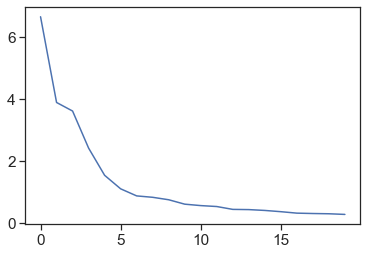

In [28]:
pca = PCA(n_components=None)
pca.fit(scaled_expression_logged_filtered_sig)
var= np.round(pca.explained_variance_ratio_, decimals=5)*100
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)
print(var1)
print (sum(var1<50))
plt.plot(var[0:20])

Text(0, 0.5, 'PC1 explains 6.6% variance')

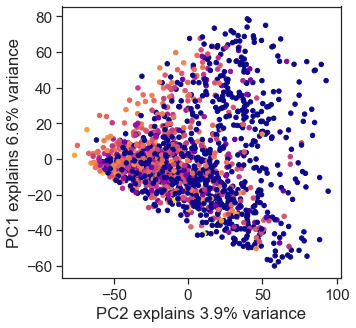

In [29]:
smusher = PCA()
smushed = pd.DataFrame(smusher.fit_transform(scaled_expression_logged_filtered_sig),
                      index = scaled_expression_logged_filtered_sig.index)

figheight = 5
figwidth = 5

fig, ax = plt.subplots(figsize=(figwidth, figheight))
y = expression_logged_filtered.loc["ENSMUSG00000019942.13"]
ax.scatter(smushed[0],smushed[1],c=y,s=20,cmap="plasma")
#ax.scatter(smushed[0],smushed[1],c=metadata_filtered["num_genes"],s=20)


xlabel = 'PC2 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[1])
ylabel = 'PC1 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[0])

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

In [187]:
##PC weights gene list
featureWeights1 = list(smusher.components_[0])
weights = pd.DataFrame(data = featureWeights1,index = expression_logged_filtered_sig.T.index)
weights.to_csv('all_tumor_K14morethan7_V1_PC1.csv')
featureWeights2 = list(smusher.components_[1])
weights = pd.DataFrame(data = featureWeights2,index = expression_logged_filtered_sig.T.index)
weights.to_csv('all_tumor_K14morethan7_V1_PC2.csv')
#featureWeights3 = list(smusher.components_[2])
#weights = pd.DataFrame(data = featureWeights3,index = expression_logged_filtered_sig.T.index)
#weights.to_csv('1-4allminusDCT_PC3.csv')
#featureWeights4 = list(smusher.components_[3])
#weights = pd.DataFrame(data = featureWeights4,index = expression_logged_filtered_sig.T.index)
#weights.to_csv('1-4allminusDCT_PC4.csv')
#featureWeights5 = list(smusher.components_[4])
#weights = pd.DataFrame(data = featureWeights5,index = expression_logged_filtered_sig.T.index)
#weights.to_csv('1-4allminusDCT_PC5.csv')

In [30]:
smushed_subset = smushed.iloc[:,0:201]
smushed_subset.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
11M-DP-P1-A2-F3_S159Aligned.quant,50.537209,-40.945516,-2.682608,14.319655,57.014670,-1.633930,-19.978707,21.094944,-8.466858,-11.687095,...,-4.734463,2.717309,1.778098,11.488652,-6.067426,1.613067,0.070199,0.206996,-0.914785,-4.478463
3M-IL-P1-B5-A1_S865Aligned.quant,47.565050,-39.509592,-23.025225,26.675664,17.905181,-0.105162,8.043663,-16.091858,0.229237,-26.012888,...,-1.538306,-5.580860,-9.111145,6.375869,7.577075,6.271052,3.408583,-1.630590,3.920017,4.454315
3M-IL-P1-B5-A2_S866Aligned.quant,57.644864,-47.325293,-16.903329,35.933487,20.390509,11.993080,14.892060,-20.488902,6.103684,-24.363824,...,3.216769,4.823413,4.001551,2.484169,-7.513757,-11.692508,-7.837361,1.929547,-2.868054,-1.171461
3M-IL-P1-B5-A3_S867Aligned.quant,26.822854,44.656383,-4.073623,-10.628825,12.692345,-19.696446,-12.159171,-5.139508,-0.111697,1.414753,...,-2.885453,2.817963,-0.556823,1.150499,-2.609283,-5.035242,-2.536260,-3.362104,5.095347,4.760256
3M-IL-P1-B5-A5_S869Aligned.quant,35.407877,3.522763,-20.112515,15.266089,29.732118,-17.458689,1.395186,-2.717303,-8.108960,-12.979733,...,-2.768833,0.404991,-1.905092,0.605667,3.783291,-3.175721,0.794025,-4.979366,-2.675436,-0.900575


In [32]:
#Filter metadata_filtered_sig to biological process associated list (R)
metadata_filtered_sig_biol = pd.read_csv("all_tumor_K14morethan7_Hras_metadata_filtered_biolvarigenes_V1_louvainclustersEUCLIDEAN_pseudotime_V1e_PI3K_Akt__leptin_angio_overallscores.csv", index_col=0)
metadata_filtered_sig_biol.head()

,orig.ident,nCount_RNA,nFeature_RNA,type,colour,mouse,mouse_colour,num_genes,Size_Factor,louvain_clusters,...,Lepr,Lepr_colour,ENSMUSG_mCherry,mCherry,Reg_angio1,Neg_reg_angio1,Pos_reg_angio1,PI3K_signaling1,Akt_signaling1,Response_leptin1
11M-DP-P1-A2-F3_S159Aligned.quant,SeuratProject,15452.72080,2990,int low suprabasal,#ffd700,11M,#8f05b5,3313,0.784911,3_three,...,neg,#c0c0c0,0,neg,0.076164,-0.586335,-0.185519,0.350355,0.164108,-0.655186
3M-IL-P1-B5-A1_S865Aligned.quant,SeuratProject,18724.60602,4363,int low suprabasal,#ffd700,3M,#0353d6,4411,0.800606,3_three,...,neg,#c0c0c0,0,neg,-0.291453,0.264458,0.246939,0.532757,0.178442,0.044737
3M-IL-P1-B5-A2_S866Aligned.quant,SeuratProject,17280.10072,3889,int low suprabasal,#ffd700,3M,#0353d6,3964,0.766300,3_three,...,neg,#c0c0c0,0,neg,0.282061,-0.082353,0.051128,0.378477,0.301950,-0.119709
3M-IL-P1-B5-A3_S867Aligned.quant,SeuratProject,24440.32067,6188,int low suprabasal,#ffd700,3M,#0353d6,6154,0.969475,1_one,...,neg,#c0c0c0,4,pos,-0.426985,-0.558339,0.012586,-0.144971,-0.190251,-0.237992
3M-IL-P1-B5-A5_S869Aligned.quant,SeuratProject,24807.23511,6806,int low suprabasal,#ffd700,3M,#0353d6,6551,0.890572,1_one,...,neg,#c0c0c0,0,neg,-0.608654,-0.434795,-0.465876,0.190502,-0.182986,-0.625115


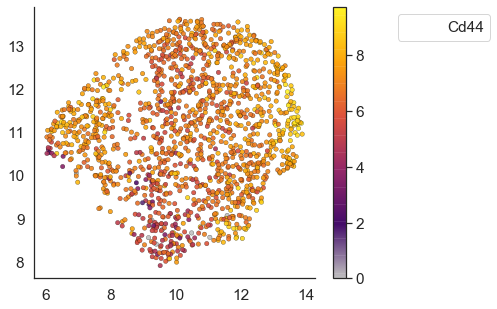

In [36]:
smusher_3 = umap.UMAP(n_neighbors=350, min_dist=0.25, n_components=2, metric='euclidean', init='spectral', spread=1, random_state=3 )

smushed_3 = pd.DataFrame(smusher_3.fit_transform(smushed_subset),index = smushed_subset.index)

figheight = 5
figwidth = 6.3

sns.set_style("white")
fig, ax = plt.subplots(figsize=(figwidth, figheight))
sns.despine()
#smushed_3 = smushed_3.sample(frac=1, replace=False)

inferno_pal = sns.blend_palette(colors=('#c0c0c0','#420a68','#932667','#dd513a','#fca50a','#fff525'), as_cmap=True)
viridis_pal = sns.blend_palette(colors=('#c0c0c0','#414487','#2a788e','#22a884','#7ad151','#fde725'), as_cmap=True)

y = expression_logged_filtered.loc["ENSMUSG00000005087.17"]
heat = ax.scatter(smushed_3[0],smushed_3[1],c=y,s=20,cmap=inferno_pal, alpha= 0.9, linewidths= 0.25, edgecolor='black')
col_scale = mpl.colors.Normalize(0,4)
#heat = ax.scatter(smushed_3[0],smushed_3[1],c=y,s=20,cmap=inferno_pal, alpha= 0.9, linewidths= 0.25, edgecolor='black', norm=col_scale)
fig.colorbar(heat)
gene_patch = mpatches.Patch (color='#ffffff', label="Cd44")
plt.legend(handles=[gene_patch], bbox_to_anchor=(1.65, 1))

#ax.scatter(smushed_3[0],smushed_3[1],c=metadata_filtered["colour"],s=20, alpha= 0.9, linewidths= 0.25, edgecolor='black')
M1_patch = mpatches.Patch(color='#ffd700', label='int low suprabasal')
M2_patch = mpatches.Patch(color='#004fff', label='mCherry neg basal')
M3_patch = mpatches.Patch(color='#dc143c', label='mCherry pos basal')
M4_patch = mpatches.Patch(color='#05a413', label='dump')
#plt.legend(handles=[M1_patch, M2_patch, M3_patch], loc="lower left", bbox_to_anchor=(1, 0.5))

#ax.scatter(smushed_3[0],smushed_3[1],c=metadata_filtered_sig_biol["mouse_colour"],s=20, alpha= 0.9, linewidths= 0.25, edgecolor='black')
M5_patch = mpatches.Patch(color='#ff00e2', label='8F')
M6_patch = mpatches.Patch(color='#0061ff', label='3M')
M7_patch = mpatches.Patch(color='#6e00b3', label='11M')
#plt.legend(handles=[M5_patch, M6_patch, M7_patch], loc="lower left", bbox_to_anchor=(1, 0.5))

#ax.scatter(smushed_3[0],smushed_3[1],c=metadata_filtered_sig_biol["Lepr_colour"],s=20, alpha= 0.9, linewidths= 0.25, edgecolor='black')
M8_patch = mpatches.Patch(color='#D657D5', label='Lepr pos')
M9_patch = mpatches.Patch(color='#c0c0c0', label='Lepr neg')
#plt.legend(handles=[M8_patch, M9_patch], loc="lower left", bbox_to_anchor=(1, 0.5))

col2_scale = mpl.colors.Normalize(0,10000)
#genes=ax.scatter(smushed_3[0],smushed_3[1],c=metadata_filtered["num_genes"],s=20, norm=col2_scale, alpha= 0.9, linewidths= 0.25, edgecolor='black')
#fig.colorbar(genes)
             
col3_scale = mpl.colors.Normalize(-1,1)
#cummul_score=ax.scatter(smushed_3[0],smushed_3[1],c=metadata_filtered_sig_biol["BMP_target_score1"],s=20, cmap='RdYlBu_r')
#cummul_score=ax.scatter(smushed_3[0],smushed_3[1],c=metadata_filtered_sig_biol["Pos_signaling_Jak_Stat1"],s=20, cmap='RdYlBu_r',alpha= 0.9, linewidths= 0.25, edgecolor='black', norm=col3_scale)
#fig.colorbar(cummul_score)

pseudo_pal = (sns.light_palette("#00188e", 605, reverse=False, as_cmap=True))
#pseudot=ax.scatter(smushed_3[0],smushed_3[1],c=metadata_filtered_sig_biol["pseudotime"],s=20, cmap=pseudo_pal)
#fig.colorbar(pseudot)

#Louv_clust=ax.scatter(smushed_3[0],smushed_3[1],c=metadata_filtered_sig_biol["cluster_colours"],s=20,cmap='Set2_r', alpha= 1, linewidths= 0.25, edgecolor='black')
#Louv_clust=ax.scatter(smushed_3[0],smushed_3[1],c=metadata_filtered_sig_biol["cluster_colours"],s=20)
